In [10]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [11]:
#Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

df = pd.read_csv(url, header=None, names=columns)
df.head(3)

,ID,Diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [12]:
#  Data Exploration and Preprocessing

df.drop('ID', axis=1, inplace=True)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})
df.isnull().sum()
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#Build and Train the class_model
class_model = RandomForestClassifier(n_estimators=100, random_state=42)
class_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
# Step 5: Evaluate the class_model

# Make predictions
y_pred = class_model.predict(X_test)
acc= accuracy_score(y_test, y_pred)
cm= confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"accfor model: {acc}")
print(f"Confusion Matrix for model:\n{cm}")
print(f"Classification Report for model:\n{report}")


accfor model: 0.9649122807017544
Confusion Matrix for model:
[[70  1]
 [ 3 40]]
Classification Report for model:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



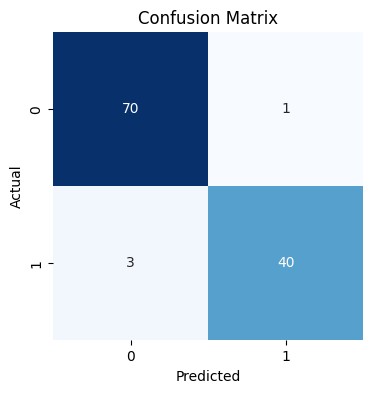

In [15]:
# Confusion Matrix Heatmap
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
